<a href="https://colab.research.google.com/github/medinadiegoeverardo/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/medinadiego_LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# seaborn wraps matplotlib (something "extends" something else)

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [4]:
# INCOME, LANDLOCKED - HOW HAS, OVER TIME, THE INCOME OF THOSE IN LANDLOCKED AREAS AND COASTLINE AREAS CHANGED?

# pd.merge(population, income, how='left', on=['geo', 'time'])
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [5]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
#entities = entities.rename(columns = {'geo':'country'})

In [6]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
income_pop = pd.merge(income, population, how='inner')

In [8]:
print(income_pop.shape)
income_pop.tail()

(46513, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,population_total
46508,zwe,2036,2939,23968335
46509,zwe,2037,3004,24382067
46510,zwe,2038,3071,24796673
46511,zwe,2039,3139,25211507
46512,zwe,2040,3209,25625981


In [0]:
total_df = pd.merge(income_pop, entities[['landlocked', 'country', 'world_4region', 'world_6region']], how='inner', left_on='geo', right_on='country') # how='inner', on=['geo']

In [0]:
entities['world_6region'].value_counts()

europe_central_asia         77
america                     53
sub_saharan_africa          53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [0]:
#land_income = pd.merge(add_income_country, entities[['world_4region', 'world_6region', 'country', 'landlocked']])

In [11]:
total_df.describe()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,population_total
count,46513.000000,46513.000000,4.651300e+04
mean,1920.000000,6392.613871,1.592035e+07
std,69.570856,13446.455483,7.787354e+07
min,1800.000000,247.000000,1.834000e+03
25%,1860.000000,917.000000,3.553370e+05
50%,1920.000000,1635.000000,2.026065e+06
75%,1980.000000,4798.000000,7.415579e+06
max,2040.000000,182339.000000,1.605356e+09


In [13]:
total_df.tail()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,population_total,landlocked,country,world_4region,world_6region
46508,zwe,2036,2939,23968335,landlocked,zwe,africa,sub_saharan_africa
46509,zwe,2037,3004,24382067,landlocked,zwe,africa,sub_saharan_africa
46510,zwe,2038,3071,24796673,landlocked,zwe,africa,sub_saharan_africa
46511,zwe,2039,3139,25211507,landlocked,zwe,africa,sub_saharan_africa
46512,zwe,2040,3209,25625981,landlocked,zwe,africa,sub_saharan_africa


In [19]:
total_df = total_df[(total_df['year'] < 2019)]
total_df.tail()

,geo,year,income,population_total,land/coast,country,4region,6region
46486,zwe,2014,1908,15411675,landlocked,zwe,africa,sub_saharan_africa
46487,zwe,2015,1891,15777451,landlocked,zwe,africa,sub_saharan_africa
46488,zwe,2016,1860,16150362,landlocked,zwe,africa,sub_saharan_africa
46489,zwe,2017,1907,16529904,landlocked,zwe,africa,sub_saharan_africa
46490,zwe,2018,1952,16913261,landlocked,zwe,africa,sub_saharan_africa


In [0]:
total_df = total_df.rename(columns = {
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'landlocked': 'land/coast',
    'world_6region': '6region',
    'world_4region': '4region'
})

In [20]:
total_df.head()

,geo,year,income,population_total,land/coast,country,4region,6region
0,afg,1800,603,3280000,landlocked,afg,asia,south_asia
1,afg,1801,603,3280000,landlocked,afg,asia,south_asia
2,afg,1802,603,3280000,landlocked,afg,asia,south_asia
3,afg,1803,603,3280000,landlocked,afg,asia,south_asia
4,afg,1804,603,3280000,landlocked,afg,asia,south_asia


In [21]:
total_df.tail()

,geo,year,income,population_total,land/coast,country,4region,6region
46486,zwe,2014,1908,15411675,landlocked,zwe,africa,sub_saharan_africa
46487,zwe,2015,1891,15777451,landlocked,zwe,africa,sub_saharan_africa
46488,zwe,2016,1860,16150362,landlocked,zwe,africa,sub_saharan_africa
46489,zwe,2017,1907,16529904,landlocked,zwe,africa,sub_saharan_africa
46490,zwe,2018,1952,16913261,landlocked,zwe,africa,sub_saharan_africa


In [0]:
now_1 = total_df[total_df['year'] == 2018]
then_1 = total_df[total_df['year'] == 1810]

now_2 = total_df[total_df['year'] > 1910]
then_2 = total_df[total_df['year'] < 1910]

In [0]:
import seaborn as sns

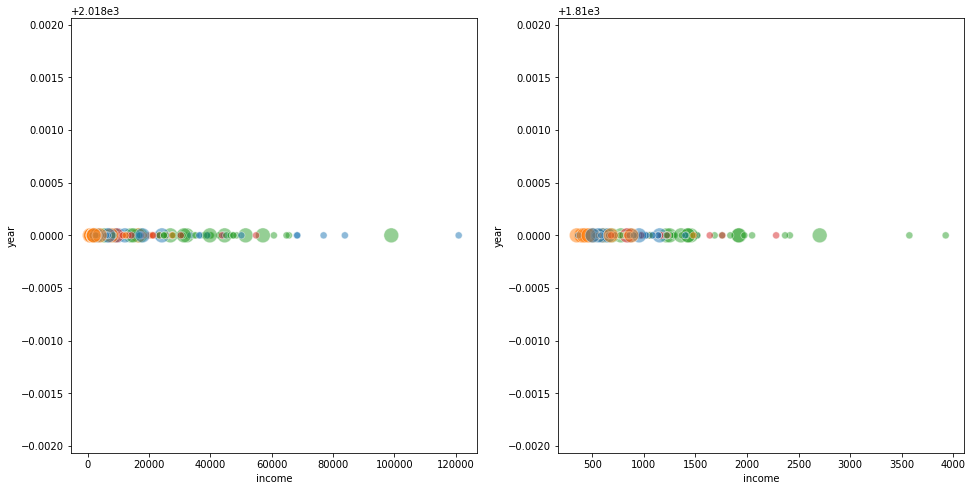

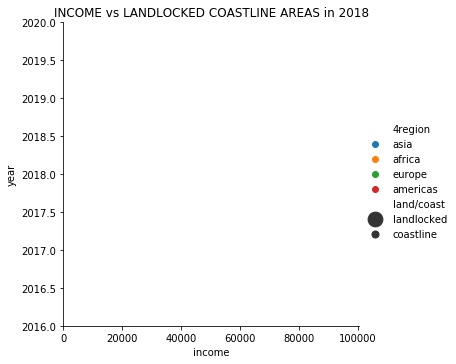

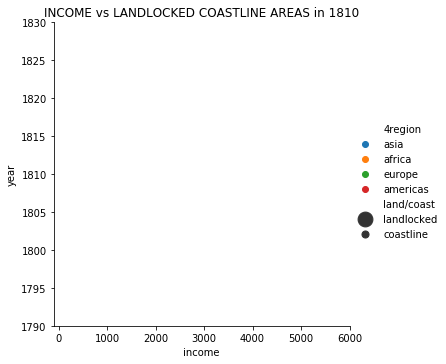

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
# INCOME, TIME, LANDLOCKED - HOW HAS, OVER TIME, THE INCOME OF THOSE IN LANDLOCKED AREAS AND COASTLINE AREAS CHANGED?

fig = sns.relplot(x='income', y='year', hue='4region', 
                  data=now_1, size='land/coast', sizes=(50, 220), alpha=.5, ax=ax[0]);

plt.title("INCOME vs LANDLOCKED COASTLINE AREAS in 2018")
plt.ylim(2016, 2020)
plt.xlim(-100,100500)


sns.relplot(x='income', y='year', hue='4region', 
            data=then_1, size='land/coast', sizes=(50, 220), alpha=.5, ax=ax[1]);

plt.title("INCOME vs LANDLOCKED COASTLINE AREAS in 1810")
plt.ylim(1790, 1830);
plt.xlim(-100,6000);

In [0]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
# plt.title("INCOME vs LANDLOCKED COASTLINE AREAS in 2018")

# sns.relplot(x='income', y='year', hue='4region', 
#             data=now_2, size='land/coast', sizes=(50, 220), alpha=.5, ax=ax[1]);

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project